In [75]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [46]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex, game_names, use_game=False):

    game_tag = "_game_I_" if use_game else "_facet_I_"

    opt_dicts = []
    for game_name in game_names:


        file_regex = resource_regex + game_tag + game_name + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## Data Analysis

In [51]:
int_data_path = "../data/interference_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names)
eatx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names)
earx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names)

qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names, use_game=True)
eatx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names, use_game=True)

int2_data_path = "../data/interference2_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names)
eatx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names)
earx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names)

qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names, use_game=True)
eatx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names, use_game=True)

bf_data_path = "../data/butterfly_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf", game_names)
qbf_cc_wings_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf_cc_wings", game_names)
eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qbf", game_names)
earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qbf", game_names)

qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf", game_names, use_game=True)
qbf_cc_wings_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf_cc_wings", game_names, use_game=True)
eatx_qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qbf", game_names, use_game=True)
earx_qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qbf", game_names, use_game=True)

min_bf_data_path = "../data/min_butterfly_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

min_qbf_facet_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"qbf", game_names)
min_eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"eatx_qbf", game_names)
min_earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"earx_qbf", game_names)

min_qbf_game_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"qbf", game_names, use_game=True)
min_eatx_qbf_game_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"eatx_qbf", game_names, use_game=True)
min_earx_qbf_game_opt_dicts = get_inequality_opt_dicts(min_bf_data_path, r"earx_qbf", game_names, use_game=True)

mac_data_path = "../data/mac_33_9_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"qmac", game_names)
eatx_qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"eatx_qmac", game_names)
ghza_qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"ghza_qmac", game_names, use_game=True)

qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"qmac", game_names, use_game=True)
eatx_qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"eatx_qmac", game_names, use_game=True)
ghza_qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"ghza_qmac", game_names, use_game=True)

bc_data_path = "../data/broadcast_9_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"qbc", game_names)
earx_qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"earx_qbc", game_names)




## Analyzing Data

In [52]:
interference_game_inequalities, interference_facet_inequalities, interference_game_names = mac.interference_33_33_network_bounds()
interference2_game_inequalities, interference2_facet_inequalities, interference2_game_names = mac.interference2_33_33_network_bounds()
butterfly_game_inequalities, butterfly_facet_inequalities, butterfly_game_names = mac.butterfly_33_33_network_bounds()
min_butterfly_game_inequalities, min_butterfly_facet_inequalities, min_butterfly_game_names = mac.min_butterfly_33_33_network_bounds()

mac_game_inequalities, mac_facet_inequalities, mac_game_names = mac.mac_33_22_9_network_bounds()
bc_game_inequalities, bc_facet_inequalities, bc_game_names = mac.broadcast_9_22_33_network_bounds()



def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(9):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound)/ (qbound - cbound)]
        

    return max_violations, qbounds, cbounds

print(interference_game_names)
qint_facet_max_violations, qint_facet_qbounds, qint_facet_cbounds = analyze_data(qint_facet_opt_dicts, interference_facet_inequalities)
eatx_qint_facet_max_violations, eatx_qint_facet_qbounds, eatx_qint_facet_cbounds = analyze_data(eatx_qint_facet_opt_dicts, interference_facet_inequalities)
earx_qint_facet_max_violations, earx_qint_facet_qbounds, earx_qint_facet_cbounds = analyze_data(earx_qint_facet_opt_dicts, interference_facet_inequalities)

qint_game_max_violations, qint_game_qbounds, qint_game_cbounds = analyze_data(qint_game_opt_dicts, interference_game_inequalities)
eatx_qint_game_max_violations, eatx_qint_game_qbounds, eatx_qint_game_cbounds = analyze_data(eatx_qint_game_opt_dicts, interference_game_inequalities)
earx_qint_game_max_violations, earx_qint_game_qbounds, earx_qint_game_cbounds = analyze_data(earx_qint_game_opt_dicts, interference_game_inequalities)


qint2_facet_max_violations, qint2_facet_qbounds, qint2_facet_cbounds = analyze_data(qint2_facet_opt_dicts, interference2_facet_inequalities)
eatx_qint2_facet_max_violations, eatx_qint2_facet_qbounds, eatx_qint2_facet_cbounds = analyze_data(eatx_qint2_facet_opt_dicts, interference2_facet_inequalities)
earx_qint2_facet_max_violations, earx_qint2_facet_qbounds, earx_qint2_facet_cbounds = analyze_data(earx_qint2_facet_opt_dicts, interference2_facet_inequalities)

qint2_game_max_violations, qint2_game_qbounds, qint2_game_cbounds = analyze_data(qint2_game_opt_dicts, interference2_game_inequalities)
eatx_qint2_game_max_violations, eatx_qint2_game_qbounds, eatx_qint2_game_cbounds = analyze_data(eatx_qint2_game_opt_dicts, interference2_game_inequalities)
earx_qint2_game_max_violations, earx_qint2_game_qbounds, earx_qint2_game_cbounds = analyze_data(earx_qint2_game_opt_dicts, interference2_game_inequalities)



qbf_facet_max_violations, qbf_facet_qbounds, qbf_facet_cbounds = analyze_data(qbf_facet_opt_dicts,  butterfly_facet_inequalities)
qbf_cc_wings_facet_max_violations, qbf_cc_wings_facet_qbounds, qbf_cc_wings_facet_cbounds = analyze_data(qbf_cc_wings_facet_opt_dicts,  butterfly_facet_inequalities)
eatx_qbf_facet_max_violations, eatx_qbf_facet_qbounds, eatx_qbf_facet_cbounds = analyze_data(eatx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)
earx_qbf_facet_max_violations, earx_qbf_facet_qbounds, earx_qbf_facet_cbounds = analyze_data(earx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)

qbf_game_max_violations, qbf_game_qbounds, qbf_game_cbounds = analyze_data(qbf_game_opt_dicts,  butterfly_game_inequalities)
qbf_cc_wings_game_max_violations, qbf_cc_wings_game_qbounds, qbf_cc_wings_game_cbounds = analyze_data(qbf_cc_wings_game_opt_dicts,  butterfly_game_inequalities)
eatx_qbf_game_max_violations, eatx_qbf_game_qbounds, eatx_qbf_game_cbounds = analyze_data(eatx_qbf_game_opt_dicts,  butterfly_game_inequalities)
earx_qbf_game_max_violations, earx_qbf_game_qbounds, earx_qbf_game_cbounds = analyze_data(earx_qbf_game_opt_dicts,  butterfly_game_inequalities)

min_qbf_facet_max_violations, min_qbf_facet_qbounds, min_qbf_facet_cbounds = analyze_data(min_qbf_facet_opt_dicts,  min_butterfly_facet_inequalities)
min_eatx_qbf_facet_max_violations, min_eatx_qbf_facet_qbounds, min_eatx_qbf_facet_cbounds = analyze_data(min_eatx_qbf_facet_opt_dicts,  min_butterfly_facet_inequalities)
min_earx_qbf_facet_max_violations, min_earx_qbf_facet_qbounds, min_earx_qbf_facet_cbounds = analyze_data(min_earx_qbf_facet_opt_dicts,  min_butterfly_facet_inequalities)

min_qbf_game_max_violations, min_qbf_game_qbounds, min_qbf_game_cbounds = analyze_data(min_qbf_game_opt_dicts,  min_butterfly_game_inequalities)
min_eatx_qbf_game_max_violations, min_eatx_qbf_game_qbounds, min_eatx_qbf_game_cbounds = analyze_data(min_eatx_qbf_game_opt_dicts,  min_butterfly_game_inequalities)
min_earx_qbf_game_max_violations, min_earx_qbf_game_qbounds, min_earx_qbf_game_cbounds = analyze_data(min_earx_qbf_game_opt_dicts,  min_butterfly_game_inequalities)




qmac_facet_max_violations, qmac_facet_qbounds, qmac_facet_cbounds = analyze_data(qmac_facet_opt_dicts, mac_facet_inequalities)
eatx_qmac_facet_max_violations, eatx_qmac_facet_qbounds, eatx_qmac_facet_cbounds = analyze_data(eatx_qmac_facet_opt_dicts, mac_facet_inequalities)
ghza_qmac_facet_max_violations, ghza_qmac_facet_qbounds, ghza_qmac_facet_cbounds = analyze_data(ghza_qmac_facet_opt_dicts, mac_facet_inequalities)

qmac_game_max_violations, qmac_game_qbounds, qmac_game_cbounds = analyze_data(qmac_game_opt_dicts, mac_game_inequalities)
eatx_qmac_game_max_violations, eatx_qmac_game_qbounds, eatx_qmac_game_cbounds = analyze_data(eatx_qmac_game_opt_dicts, mac_game_inequalities)
ghza_qmac_game_max_violations, ghza_qmac_game_qbounds, ghza_qmac_game_cbounds = analyze_data(ghza_qmac_game_opt_dicts, mac_game_inequalities)

qbc_facet_max_violations, qbc_facet_qbounds, qbc_facet_cbounds = analyze_data(qbc_facet_opt_dicts, bc_facet_inequalities)
earx_qbc_facet_max_violations, earx_qbc_facet_qbounds, earx_qbc_facet_cbounds = analyze_data(earx_qbc_facet_opt_dicts, bc_facet_inequalities)



['mult0', 'mult1', 'swap', 'adder', 'compare', 'perm', 'diff', 'cv']


In [53]:
x_axis = np.arange(len(interference_game_names))
x_labels = interference_game_names
x_labels = ["Mult-0", "Mult-1", "Swap", "Add", "Comp", "Perm", "Diff", "CV"]
x_labels_games = [
    r"$\mathbf{G}^{\times_0}$",
    r"$\mathbf{G}^{\times_1}$",
    r"$\mathbf{G}^{\leftrightarrow}$",
    r"$\mathbf{G}^{+}$",
    r"$\mathbf{G}^{\gtrless}$",
    r"$\mathbf{G}^{\pi}$",
    r"$\mathbf{G}^{-}$",
    r"$\mathbf{G}^{\rm{CV}}$",
]
x_labels_facets = [
    r"$\widehat{\mathbf{G}}^{\times_0}$",
    r"$\widehat{\mathbf{G}}^{\times_1}$",
    r"$\widehat{\mathbf{G}}^{\leftrightarrow}$",
    r"$\widehat{\mathbf{G}}^{+}$",
    r"$\widehat{\mathbf{G}}^{\gtrless}$",
    r"$\widehat{\mathbf{G}}^{\pi}$",
    r"$\widehat{\mathbf{G}}^{-}$",
    r"$\widehat{\mathbf{G}}^{\rm{CV}}$",
]


0.9999370203904911
[tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True)]
[7, 5, 4, 5, 6, 4, 7, 4]


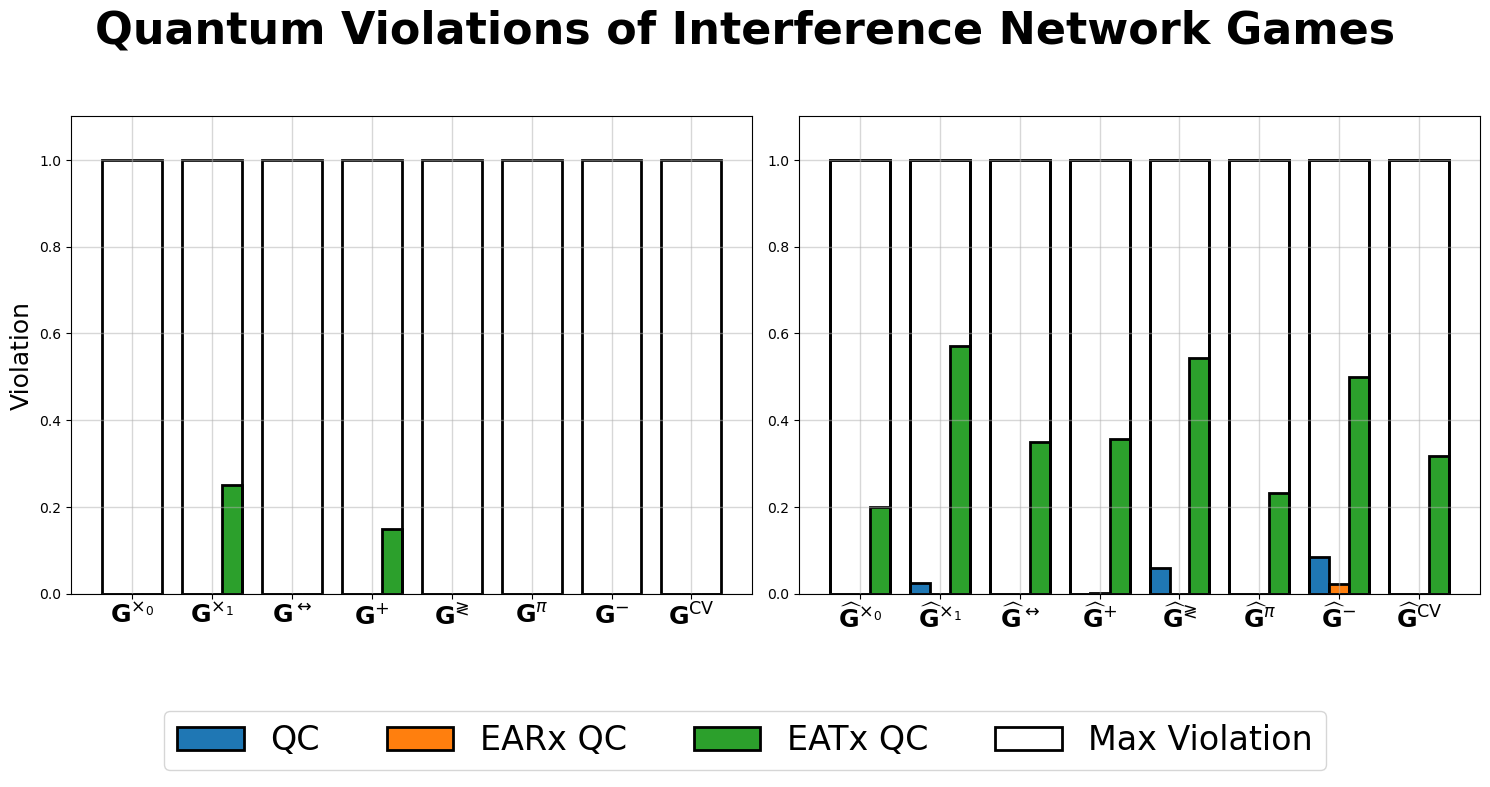

In [54]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint_game_max_violations[1]*4)
print(eatx_qint_game_qbounds)
print(eatx_qint_game_cbounds)


ax1.bar(x_axis-1*width, qint_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

-1.6553123280615976e-05
[tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True)]
[7, 4, 2, 5, 6, 2, 7, 2]


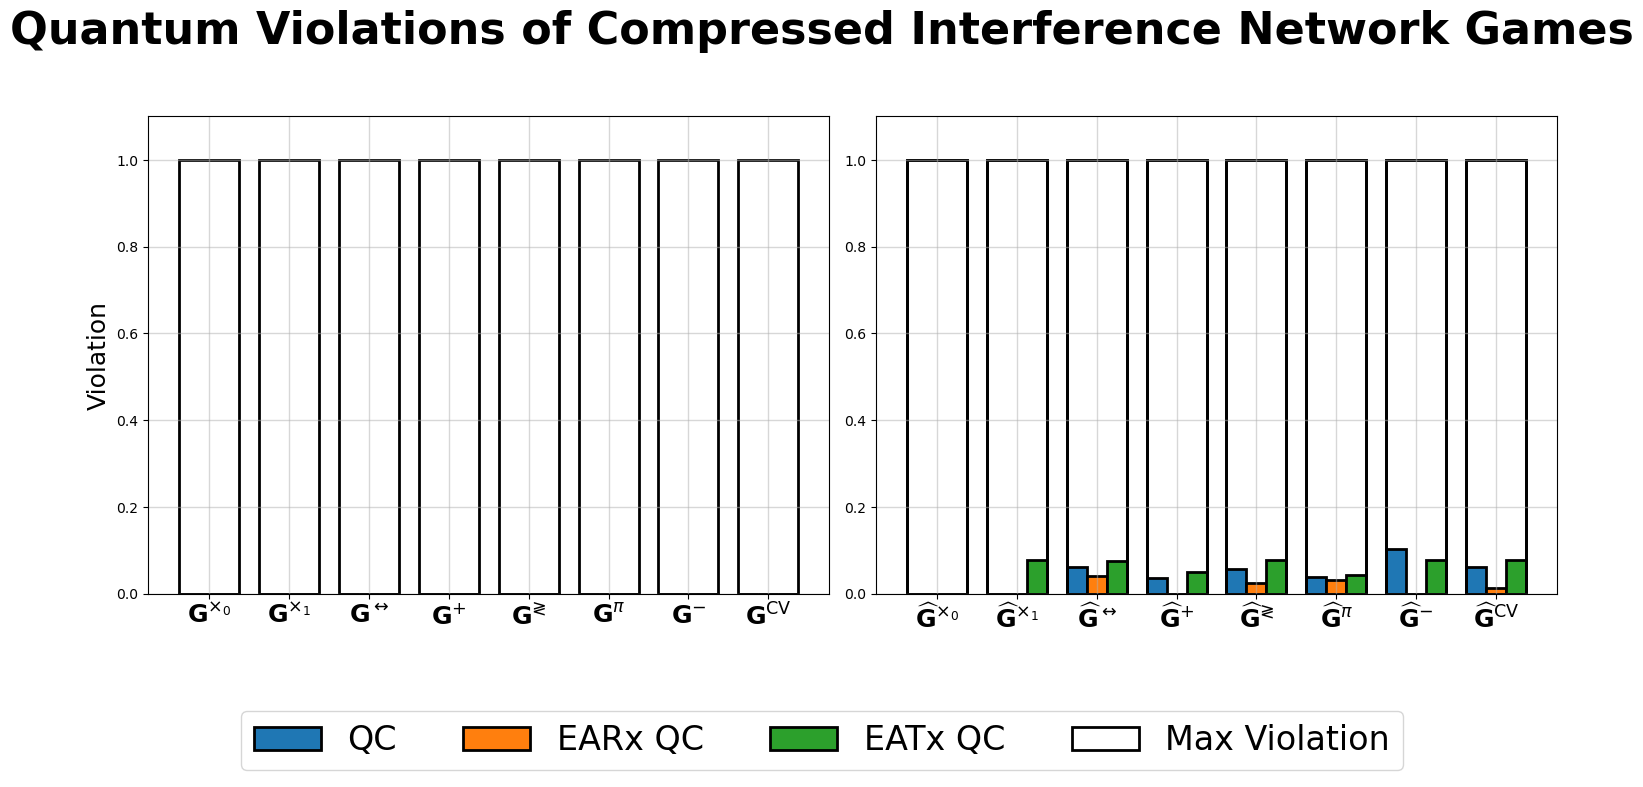

In [31]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint2_game_max_violations[1]*4)
print(eatx_qint2_game_qbounds)
print(eatx_qint2_game_cbounds)


ax1.bar(x_axis-1*width, qint2_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint2_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint2_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint2_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint2_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint2_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Compressed Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

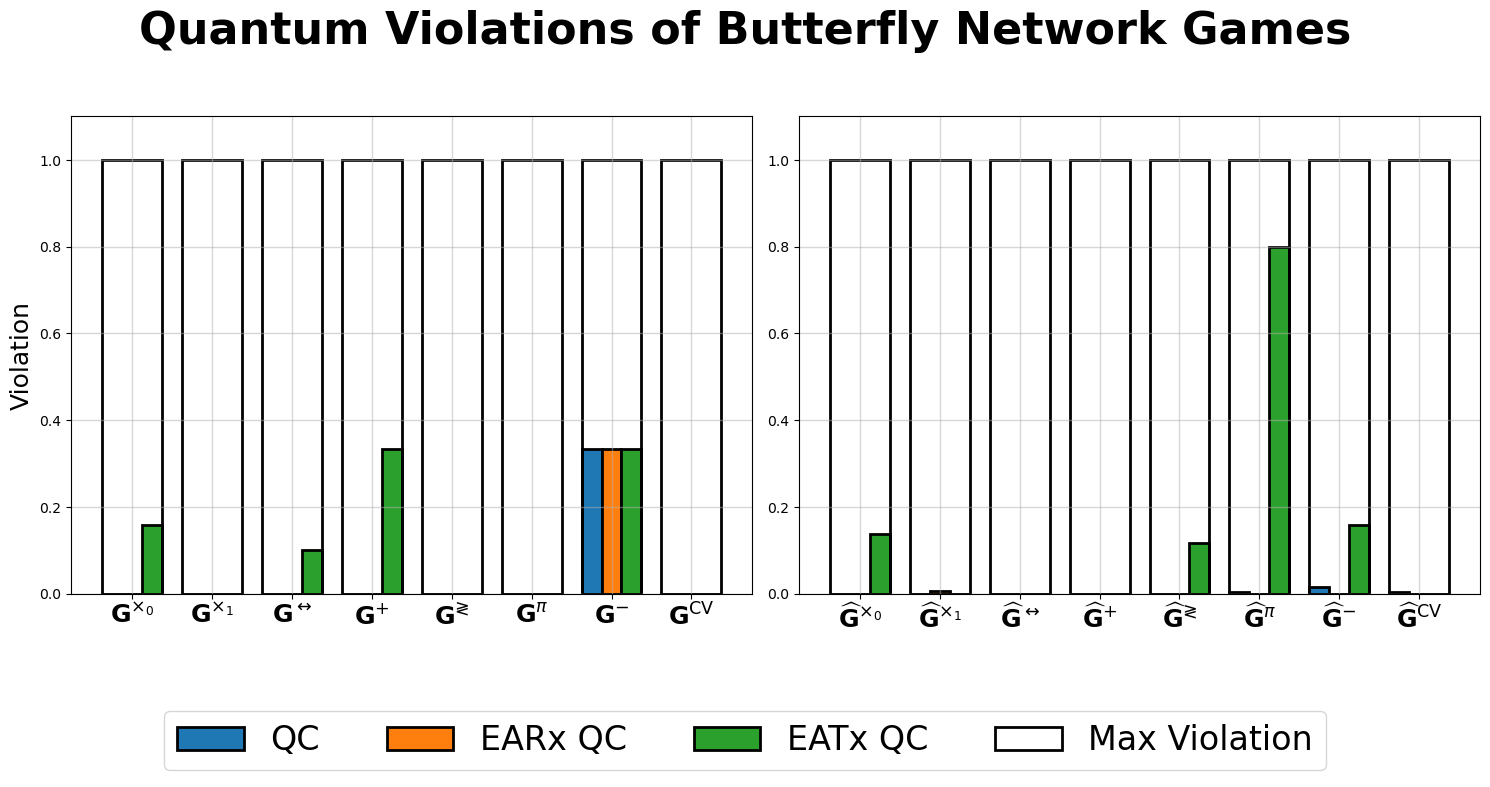

In [32]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, qbf_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qbf_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qbf_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qbf_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qbf_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qbf_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Butterfly Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

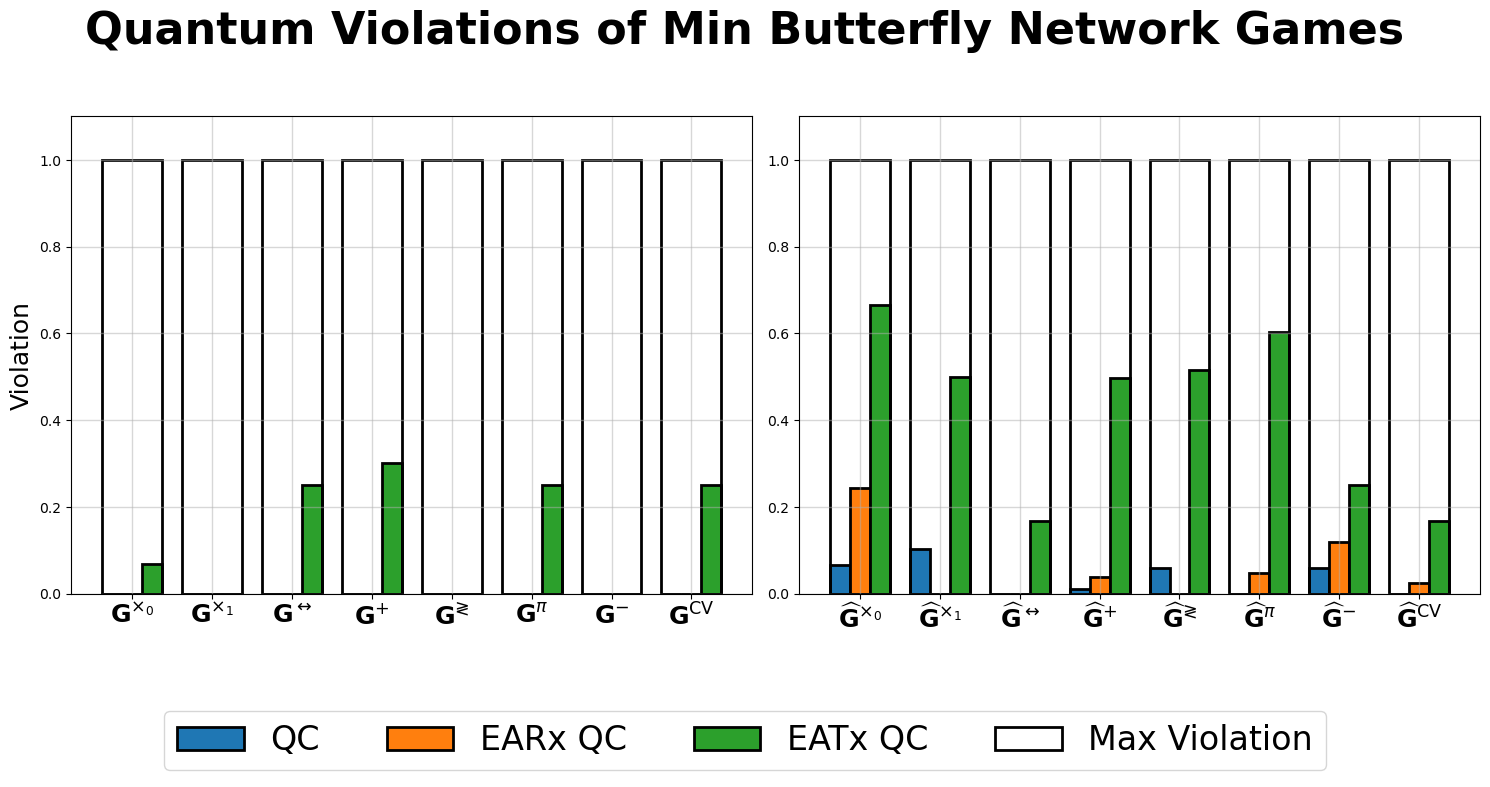

In [33]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, min_qbf_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, min_earx_qbf_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, min_eatx_qbf_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, min_qbf_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, min_earx_qbf_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, min_eatx_qbf_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Min Butterfly Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

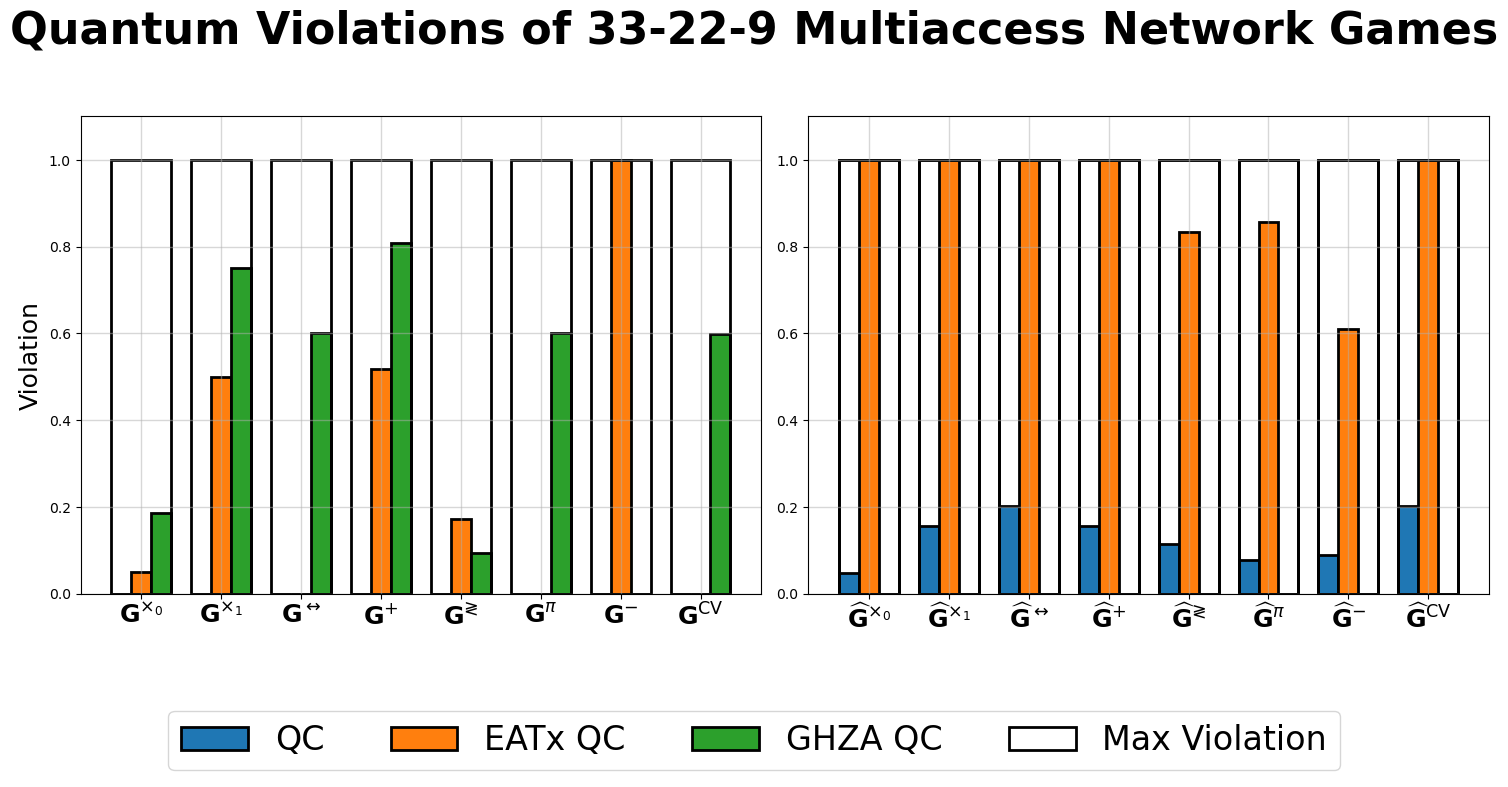

In [55]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, qmac_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, eatx_qmac_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, ghza_qmac_game_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qmac_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, eatx_qmac_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, ghza_qmac_facet_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of 33-22-9 Multiaccess Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

In [59]:
def print_max_violations_table(
    network_names,qc_max_violations,eatx_max_violations,earx_max_violations, game_names, network_cbounds, network_qbounds, is_game=True,
):
    table = [["Networks \ Games"] + game_names]
    for i, network_name in enumerate(network_names):
        table += [[network_name]]
        for j, game_name in enumerate(game_names):

            unscale = lambda scaled_score, cbound, qbound: scaled_score * (qbound - cbound) + cbound

            cbound = network_cbounds[i][j] if is_game else 0
            qc_violation = unscale(qc_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else qc_max_violations[i][j]
            earx_qc_violation = unscale(earx_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else earx_max_violations[i][j]
            eatx_qc_violation = unscale(eatx_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else eatx_max_violations[i][j]


            table[i+1] += [(cbound, qc_violation, earx_qc_violation, eatx_qc_violation)]

    return table


network_names = ["Interference", "Compressed Interference", "Butterfly", "Min Butterfly"]
network_max_facet_qc_violations = [
    qint_facet_max_violations,
    qint2_facet_max_violations,
    qbf_facet_max_violations,
    min_qbf_facet_max_violations,
]
network_max_facet_eatx_qc_violations = [
    eatx_qint_facet_max_violations,
    eatx_qint2_facet_max_violations,
    eatx_qbf_facet_max_violations,
    min_eatx_qbf_facet_max_violations,
]

network_max_facet_earx_qc_violations = [
    earx_qint_facet_max_violations,
    earx_qint2_facet_max_violations,
    earx_qbf_facet_max_violations,
    min_earx_qbf_facet_max_violations,
]

network_facet_qbounds = [
    qint_facet_qbounds,
    qint2_facet_qbounds,
    qbf_facet_qbounds,
    min_qbf_facet_qbounds,
]
network_facet_cbounds = [
    qint_facet_cbounds,
    qint2_facet_cbounds,
    qbf_facet_cbounds,
    min_qbf_facet_cbounds,
]

network_max_game_qc_violations = [
    qint_game_max_violations,
    qint2_game_max_violations,
    qbf_game_max_violations,
    min_qbf_game_max_violations,
]
network_max_game_eatx_qc_violations = [
    eatx_qint_game_max_violations,
    eatx_qint2_game_max_violations,
    eatx_qbf_game_max_violations,
    min_eatx_qbf_game_max_violations,
]

network_max_game_earx_qc_violations = [
    earx_qint_game_max_violations,
    earx_qint2_game_max_violations,
    earx_qbf_game_max_violations,
    min_earx_qbf_game_max_violations,
]

network_game_qbounds = [
    qint_game_qbounds,
    qint2_game_qbounds,
    qbf_game_qbounds,
    min_qbf_game_qbounds,
]
network_game_cbounds = [
    qint_game_cbounds,
    qint2_game_cbounds,
    qbf_game_cbounds,
    min_qbf_game_cbounds,
]



# qmac_facet_max_violations, qmac_facet_qbounds, qmac_facet_cbounds = analyze_data(qmac_facet_opt_dicts, mac_facet_inequalities)
# eatx_qmac_facet_max_violations, eatx_qmac_facet_qbounds, eatx_qmac_facet_cbounds = analyze_data(eatx_qmac_facet_opt_dicts, mac_facet_inequalities)


# qbc_facet_max_violations, qbc_facet_qbounds, qbc_facet_cbounds = analyze_data(qbc_facet_opt_dicts, bc_facet_inequalities)
# earx_qbc_facet_max_violations, earx_qbc_facet_qbounds, earx_qbc_facet_cbounds = analyze_data(earx_qbc_facet_opt_dicts, bc_facet_inequalities)



game_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_game_qc_violations,
    eatx_max_violations=network_max_game_eatx_qc_violations,
    earx_max_violations=network_max_game_earx_qc_violations,
    game_names=x_labels,
    network_cbounds=network_game_cbounds,
    network_qbounds=network_game_qbounds,
    is_game=True,
)

scaled_game_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_game_qc_violations,
    eatx_max_violations=network_max_game_eatx_qc_violations,
    earx_max_violations=network_max_game_earx_qc_violations,
    game_names=x_labels,
    network_cbounds=network_game_cbounds,
    network_qbounds=network_game_qbounds,
    is_game=False,
)

facet_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_facet_qc_violations,
    eatx_max_violations=network_max_facet_eatx_qc_violations,
    earx_max_violations=network_max_facet_earx_qc_violations,
    game_names=x_labels,
    network_cbounds=network_facet_cbounds,
    network_qbounds=network_facet_qbounds,
    is_game=False,
)

/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_33594/3677986929.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=60)
/var/folders/ft/df8cv0rd2pv4tw8tjypjwrx00000gn/T/ipykernel_33594/3677986929.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


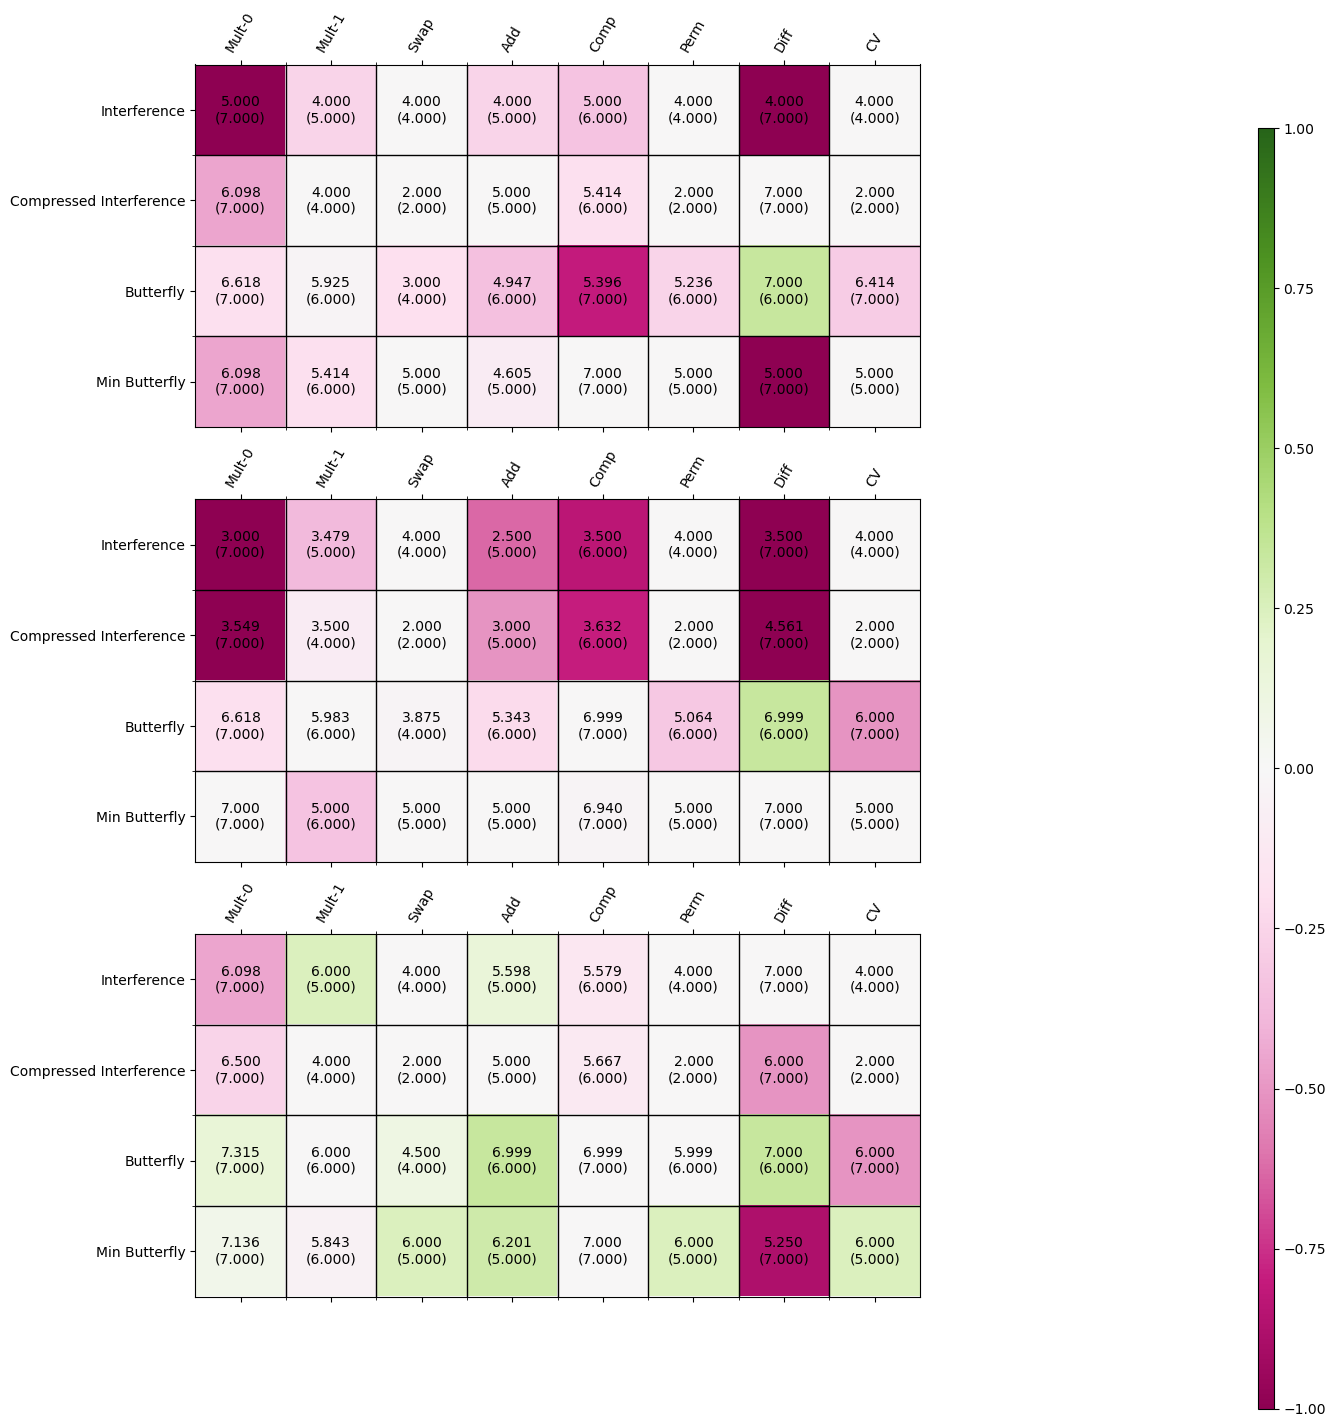

In [113]:
fig, (qc_ax, earx_qc_ax, eatx_qc_ax) = plt.subplots(nrows=3, figsize=(16,16))

cc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[0] , row[1:])), 
    game_max_violations_table_data[1:])
)
qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    game_max_violations_table_data[1:])
)
earx_qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    game_max_violations_table_data[1:])
)
eatx_qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    game_max_violations_table_data[1:])
)
scaled_qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
)
scaled_earx_qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
)
scaled_eatx_qc_table_data = list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
)

pcm_qc = qc_ax.matshow(scaled_qc_table_data, cmap=mpl.colormaps["PiYG"], vmax=1,vmin= -1)
pcm_earx_qc = earx_qc_ax.matshow(scaled_earx_qc_table_data, cmap=mpl.colormaps["PiYG"], vmax=1,vmin= -1)
pcm_eatx_qc = eatx_qc_ax.matshow(scaled_eatx_qc_table_data, cmap=mpl.colormaps["PiYG"], vmax=1,vmin= -1)

y_tick_labels = list(map(lambda row: row[0], game_max_violations_table_data))
x_tick_labels = list(map(lambda name: name, game_max_violations_table_data[0]))

for ax in [qc_ax, earx_qc_ax, eatx_qc_ax]:
    ax.set_yticks([y + 0.5 for y in range(0, 3)], minor=True)
    ax.set_xticks([x + 0.5 for x in range(0, 7)], minor=True)
    ax.grid(which="minor", ls="-", lw=1, color="black")
    ax.set_xticklabels(x_tick_labels, rotation=60)
    ax.set_yticklabels(y_tick_labels)


for y in range(len(cc_table_data)):
    for x in range(len(cc_table_data[0])):
        qc_ax.text(x, y, '%.3f' % qc_table_data[y][x] + "\n" + '(%.3f)' % cc_table_data[y][x],
            horizontalalignment='center',
            verticalalignment='center',
        )
        earx_qc_ax.text(x, y, '%.3f' % earx_qc_table_data[y][x] + "\n" + '(%.3f)' % cc_table_data[y][x],
            horizontalalignment='center',
            verticalalignment='center',
        )
        eatx_qc_ax.text(x, y, '%.3f' % eatx_qc_table_data[y][x] + "\n" + '(%.3f)' % cc_table_data[y][x],
            horizontalalignment='center',
            verticalalignment='center',
        )



cb_ax = fig.add_axes([0.95, 0.04, 0.01, 0.8])
cbar = fig.colorbar(pcm_qc, cax=cb_ax)


In [94]:
list(map(lambda row: row[0], game_max_violations_table_data[1:]))

['Interference', 'Compressed Interference', 'Butterfly', 'Min Butterfly']

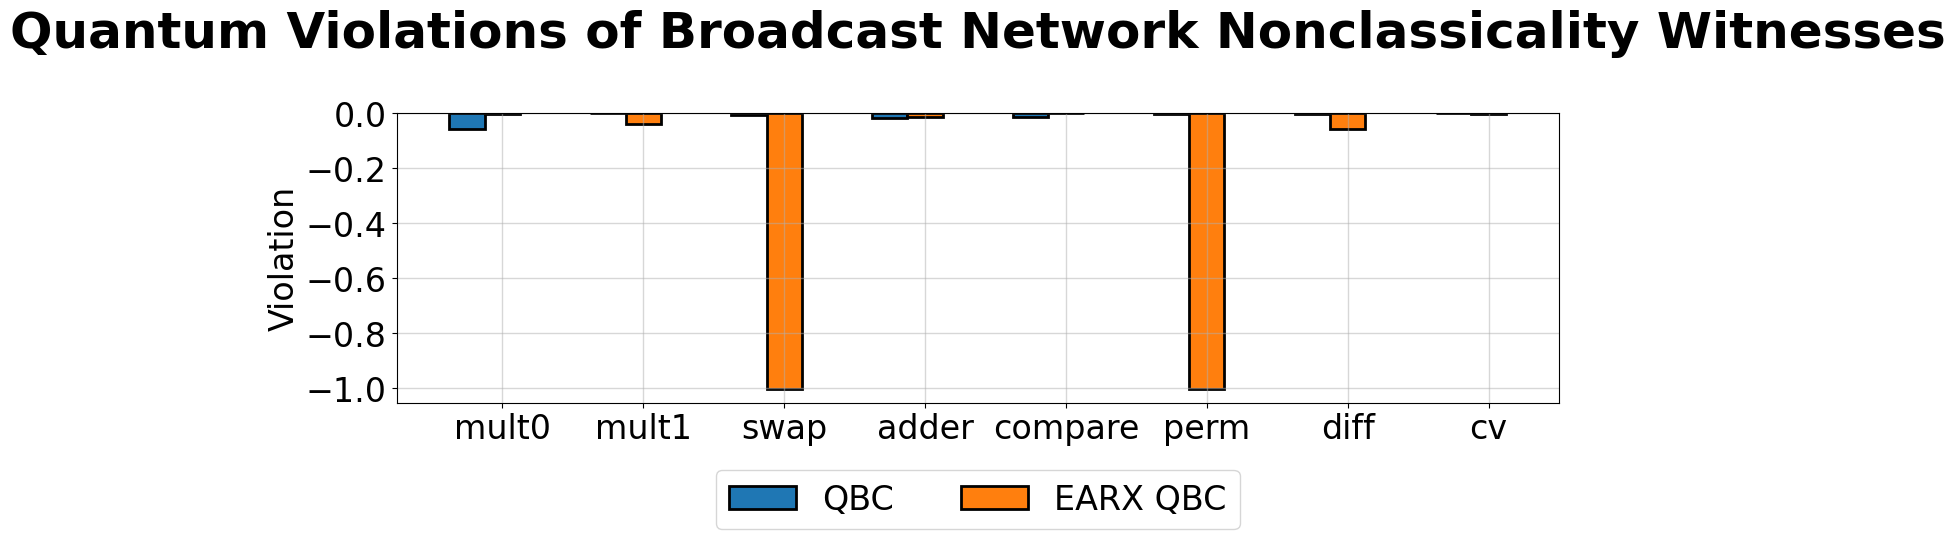

In [16]:
x_axis = np.arange(len(bc_game_names))
x_labels = bc_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qbc_facet_max_violations, width=width, label="QBC", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, earx_qbc_facet_max_violations, width=width, label="EARX QBC", edgecolor="black",linewidth=2)
# plt.bar(x_axis+1*width, earx_qbf_facet_max_violations, width=width, label="EARX QBF", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qmac_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Broadcast Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

In [69]:
a = [[1,2,3],[4,5,6],[7,8,9]]

np.transpose(a)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])